In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('eval.csv')

In [3]:
df.head(100)

,type of prompt,model type,correct answer,incorrect answer,No Answer
0,zero_shot_prompt,Qwen2.5-7B,799,201,93
1,zero_shot_prompt,Qwen2.5-7B,793,207,104
2,zero_shot_prompt,Qwen2.5-7B,792,208,113
3,zero_shot_prompt,Qwen2.5-7B,801,199,94
4,zero_shot_prompt,Qwen2.5-7B,794,206,99
5,five_shot_prompt,Qwen2.5-7B,774,226,114
6,five_shot_prompt,Qwen2.5-7B,776,224,97
7,five_shot_prompt,Qwen2.5-7B,774,226,112
8,five_shot_prompt,Qwen2.5-7B,765,235,109
9,five_shot_prompt,Qwen2.5-7B,770,230,116


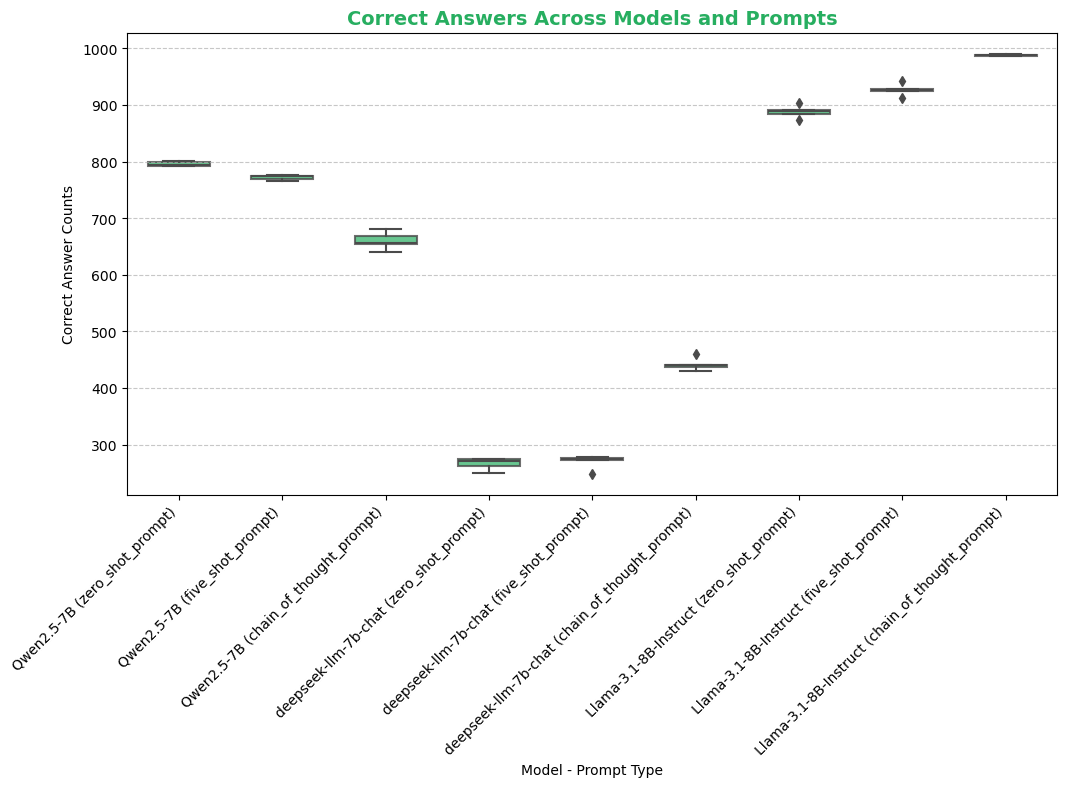

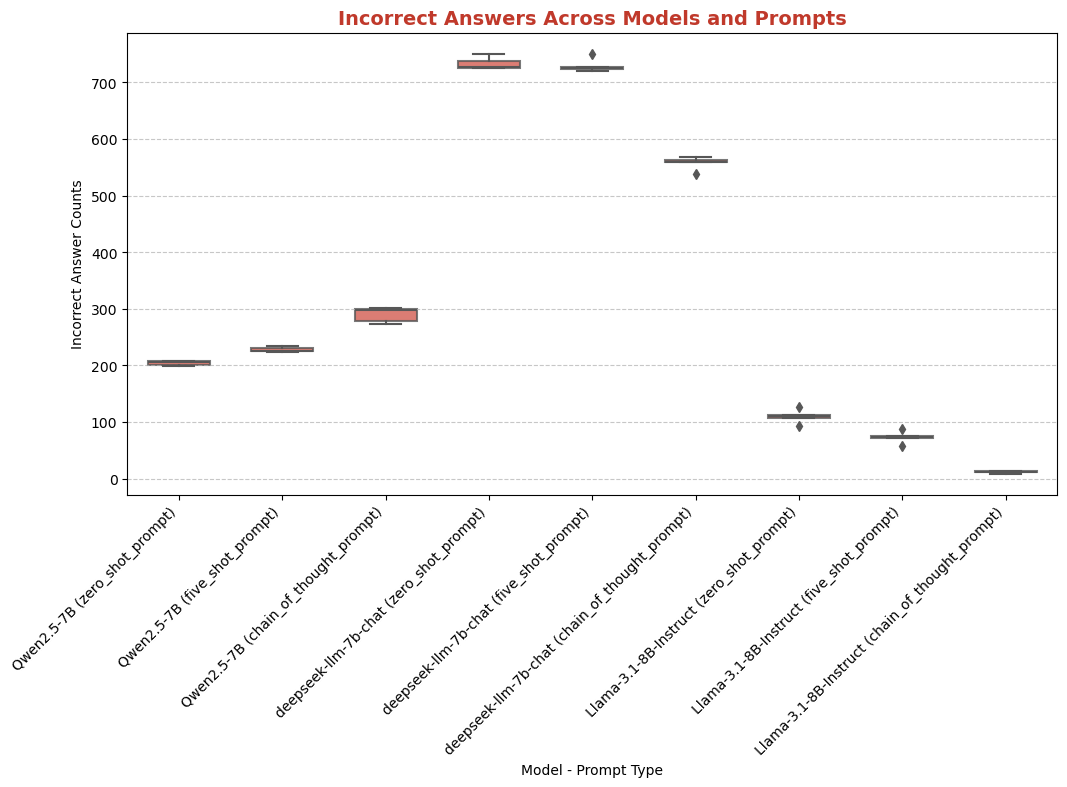

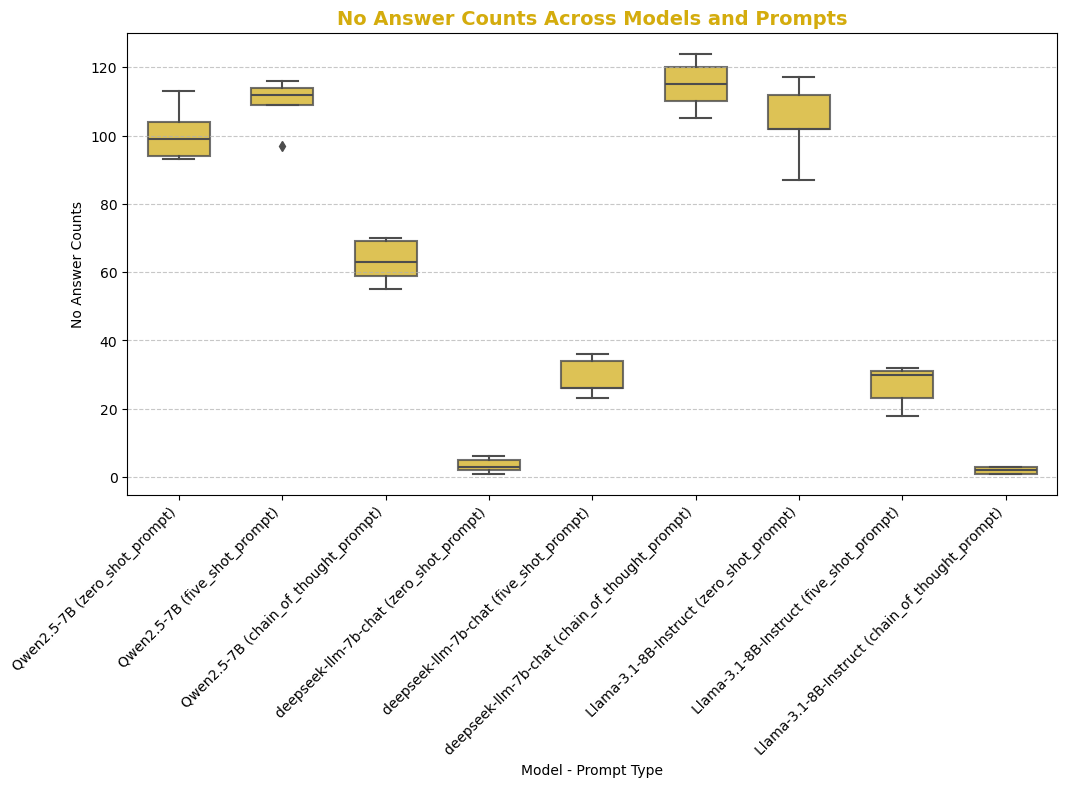

In [10]:
# Ensure the column names match the dataset
correct_col = "correct answer"  
incorrect_col = "incorrect answer"  
no_answer_col = "No Answer"
model_col = "model type"
prompt_col = "type of prompt"  

# Combine model and prompt type for better grouping
df["Model-Prompt"] = df[model_col] + " (" + df[prompt_col] + ")"

# Creating the first boxplot for correct answers
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model-Prompt", y=correct_col, data=df, color="#2ECC71", width=0.6, boxprops=dict(alpha=0.8))
plt.xticks(rotation=45, ha="right")
plt.title("Correct Answers Across Models and Prompts", fontsize=14, fontweight='bold', color="#27AE60")
plt.ylabel("Correct Answer Counts")
plt.xlabel("Model - Prompt Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Creating the second boxplot for incorrect answers
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model-Prompt", y=incorrect_col, data=df, color="#E74C3C", width=0.6, boxprops=dict(alpha=0.8))
plt.xticks(rotation=45, ha="right")
plt.title("Incorrect Answers Across Models and Prompts", fontsize=14, fontweight='bold', color="#C0392B")
plt.ylabel("Incorrect Answer Counts")
plt.xlabel("Model - Prompt Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Creating the third boxplot for no answers
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model-Prompt", y=no_answer_col, data=df, color="#F1C40F", width=0.6, boxprops=dict(alpha=0.8))
plt.xticks(rotation=45, ha="right")
plt.title("No Answer Counts Across Models and Prompts", fontsize=14, fontweight='bold', color="#D4AC0D")
plt.ylabel("No Answer Counts")
plt.xlabel("Model - Prompt Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


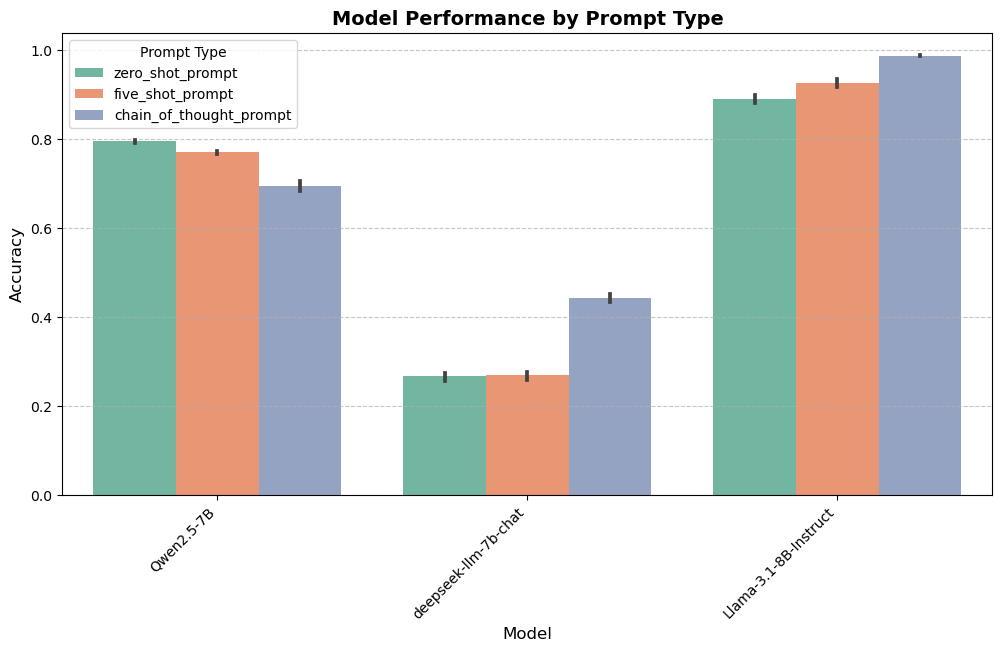

In [11]:
# Calculate accuracy (excluding "No Answer" cases)
df["accuracy"] = df["correct answer"] / (df["correct answer"] + df["incorrect answer"])

# Create bar plot for accuracy across models and prompt types
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="model type", y="accuracy", hue="type of prompt", palette="Set2")
plt.title("Model Performance by Prompt Type", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Prompt Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
